In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f_x(x):
    return np.exp(x)*np.sin(x)

def f_prime_analytical(x):
    return np.exp(x)*(np.sin(x) + np.cos(x)) 

def f_second(x):
    return 2*np.exp(x)*(np.cos(x) - np.sin(x)) 
    

def get_fprime_x(h, x_st = 0, x_en = 2*np.pi):
    # x_arr = np.linspace(0, 2*np.pi, N)
    x_arr = np.arange(x_st, x_en, h)
    N = len(x_arr)
    f = f_x(x_arr)
    f_prime = np.zeros_like(x_arr)
    for i, x in enumerate(x_arr):
        if i!= 0 and i!= (N-1):
            f_prime[i] = (f[i + 1] - f[i-1])/(2*h)
        elif i == 0:
            #starting point, only forward difference possible
            f_prime[i] = (f[i + 1] - f[i])/h
        else:
             f_prime[i] = (f[i] - f[i - 1])/h
    return x_arr, f_prime   


def get_fprime_x_v2(h):
    # x_arr = np.linspace(0, 2*np.pi, N)
    x_arr = np.arange(0, 2*np.pi, h)
    N = len(x_arr)
    f = f_x(x_arr)
    f_prime = f * 0
    f_prime[1:-1] = 0.5 / h * (f[2:] - f[:-2])
    f_prime[0] = (1.0 / h) *(f[1] - f[0] ) 
    f_prime[-1] = (1.0 / h) *(f[-1] - f[-2]) 
    return x_arr, f_prime

def get_fprime_x_v3(x, f):
    h = x[1] - x[0]
    f_prime = np.zeros_like(x)
    for i, x in enumerate(x):
        if i!= 0 and i!= (N-1):
            f_prime[i] = (f[i + 1] - f[i-1])/(2*h)
        elif i == 0:
            #starting point, only forward difference possible
            f_prime[i] = (f[i + 1] - f[i])/h
        else:
             f_prime[i] = (f[i] - f[i - 1])/h
    return f_prime 
  


def get_fprime_x_v4(x, f):
    h = x[1] - x[0]
    f_prime = f * 0
    f_prime[1:-1] = 0.5 / h * (f[2:] - f[:-2])
    f_prime[0] = (1.0 / h) *(f[1] - f[0] ) 
    f_prime[-1] = (1.0 / h) *(f[-1] - f[-2]) 
    return f_prime
  

In [3]:
%%time 
h = 0.001
x_itr, fprime_itr = get_fprime_x(h)

CPU times: user 3.88 ms, sys: 0 ns, total: 3.88 ms
Wall time: 3.75 ms


In [4]:
%%time 
h = 0.001
x_itr, fprime_itr2 = get_fprime_x_v2(h)

CPU times: user 220 µs, sys: 173 µs, total: 393 µs
Wall time: 267 µs


In [5]:
np.sum(np.abs(fprime_itr - fprime_itr2))

2.0323742688788116e-12

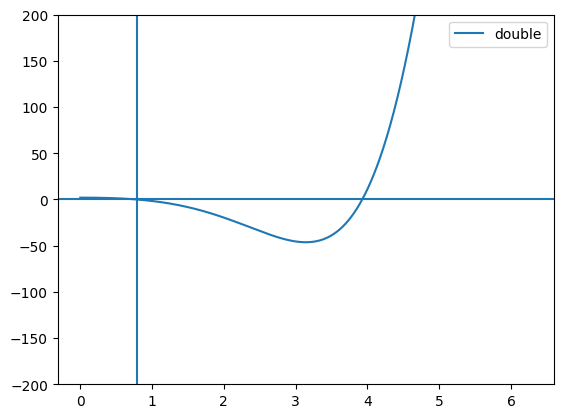

In [6]:
step_sizes = np.array([0.04, 0.02, 0.01])

for h_itr in step_sizes:
    x_itr, fprime_itr = get_fprime_x(h_itr)
    # plt.plot(x_itr, fprime_itr, label = r'$ h = $' + str(h_itr))

# plt.plot(x_itr, f_prime_analytical(x_itr), label= 'Analytical')
plt.plot(x_itr, f_second(x_itr), label= 'double')
plt.axhline(0)
plt.axvline(np.pi/4.0)
plt.ylim(-200,200)    
plt.legend()
plt.show()

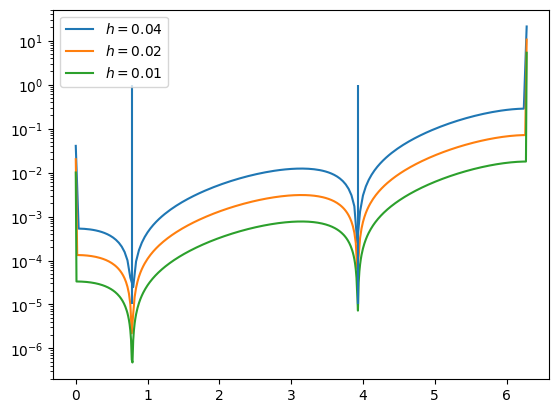

In [7]:
for h_itr in step_sizes:
    x_itr, fprime_itr = get_fprime_x(h_itr)
    f_prime_analytical_itr = f_prime_analytical(x_itr)
    diff = np.abs(f_prime_analytical_itr - fprime_itr )
    plt.plot(x_itr, diff, label = r'$ h = $' + str(h_itr))
plt.vlines(np.pi/4.0, 1e-5, 1e0)
plt.vlines(5*np.pi/4.0, 1e-5, 1e0)

plt.legend()
plt.yscale('log')
# plt.xlim(0, 3.0)
plt.show()

In [8]:
# %%time
# h = step_sizes[2]
# x_h, fprime_h = get_fprime_x(h)  
# x_2h, fprime_2h = get_fprime_x(2*h)
# x_4h, fprime_4h = get_fprime_x(4*h)
# n = np.zeros_like(x_4h)


# for i, x_i in enumerate(x_h):
#     for j, x_j in enumerate(x_2h):
#         for k, x_k in enumerate(x_4h):
#             if x_i == x_j and x_j == x_k:
#                 num = fprime_4h[k] - fprime_2h[j]
#                 den = fprime_2h[j] - fprime_h[i]
#                 n[k] = np.log2(num/den) 
                

# plt.figure()
# plt.plot(x_4h, n)
# plt.vlines(0.8, 1, 2)
# plt.show()



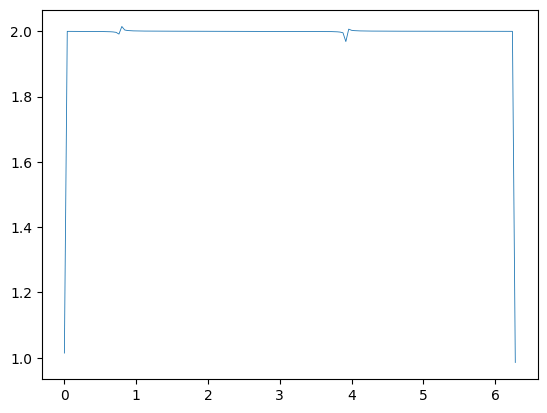

CPU times: user 182 ms, sys: 187 ms, total: 370 ms
Wall time: 134 ms


In [11]:
%%time
h = step_sizes[2]
x_h, fprime_h = get_fprime_x(h)  
x_2h, fprime_2h = get_fprime_x(2*h)
x_4h, fprime_4h = get_fprime_x(4*h)

dx_42 = np.abs(fprime_4h - fprime_2h[::2])
dx_21 = np.abs(fprime_2h[::2] - fprime_h[::4])


n = np.log2(dx_42/dx_21) 
                
plt.figure()
# plt.scatter(x_4h, n, s = 10)

plt.plot(x_4h, n , lw = 0.6)
# plt.vlines(0.8, 1, 2)
plt.show()